In [1]:
import numpy as np
import random
import pandas as pd
import cmath
import matplotlib.pyplot as plt

In [2]:
def functionValue(x):
    y=5*x[0,0]**2+x[1,0]**2+4*x[0,0]*x[1,0]-14*x[0,0]-6*x[1,0]+20
    return y

def functionGradient(x):
    d=[[10*x[0,0]+4*x[1,0]-14],[2*x[1,0]+4*x[0,0]-6]]
    d=np.array(d)
    return d

def determineStepSize(x,d):
    alpha=-(10*x[0]*d[0] + 2*x[1]*d[1] + 4*x[1]*d[0] + 4*x[0]*d[1]-14*d[0]-6*d[1])/(2*(5*d[0]**2 + d[1]**2 + 4*d[0]*d[1]))
    return alpha


In [3]:
Q=np.array([[10,4],[4,2]])
q=np.array([[-14],[-6]])
xk=[np.array([[random.randint(-10, 10)],[random.randint(-10, 10)]])]
#xk=[np.array([[0],[10]])]
#print(xk)
k=0
dk=[]
alphak=[]
dk.append(-functionGradient(xk[0]))
d1_pd=[]
d2_pd=[]
x1_pd=[]
x2_pd=[]
dnorm2_pd=[]
alpha_pd=[]
value_pd=[]

while np.linalg.norm(dk[k])>1e-6 and k<=100:
    d1_pd.append(dk[k][0])
    d2_pd.append(dk[k][1])
    x1_pd.append(xk[k][0])
    x2_pd.append(xk[k][1])
    dnorm2=cmath.sqrt((dk[k][0]*dk[k][0])+(dk[k][1]*dk[k][1]))
    dnorm2_pd.append(dnorm2)
    alphak.append(determineStepSize(xk[k],dk[k]))
    alpha_pd.append(alphak[k])
    value_pd.append(functionValue(xk[k]))

    xk.append(xk[k]+alphak[k]*dk[k])
    k=k+1
    dk.append(-functionGradient(xk[k]))


print("The optimal value is reported as %.6f" % functionValue(xk[-1]))
print("An optimal solution is given by (%.6f,%.6f)" % (xk[-1][0,0],xk[-1][1,0]))


The optimal value is reported as 10.000000
An optimal solution is given by (1.000000,1.000000)


<ipython-input-3-ca8f899be830>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dnorm2=cmath.sqrt((dk[k][0]*dk[k][0])+(dk[k][1]*dk[k][1]))


In [4]:
Table = {"$x1$":x1_pd,"$x2$":x2_pd,"$d1$":d1_pd,"$d2$":d2_pd,"$length d$":dnorm2_pd,"$alpha$":alpha_pd,"$value$":value_pd}
SelectedDF = pd.DataFrame(Table)
SelectedDF

,$x1$,$x2$,$d1$,$d2$,$length d$,$alpha$,$value$
0,[-7],[1],[80],[32],86.162637+ 0.000000j,[0.08579881656804733],330.000000
1,[-0.1360946745562135],[3.7455621301775146],[0.3786982248520765],[-0.9467455621301752],1.019676+ 0.000000j,[2.9000000000000137],11.514793
2,[0.9621301775148134],[0.9999999999999933],[0.37869822485189175],[0.15147928994075954],0.407870+ 0.000000j,[0.08579881656804707],10.007171
3,[0.9946220370435259],[1.0129967438114786],[0.001792654318826692],[-0.004481635797061401],0.004827+ 0.000000j,[2.900000000000037],10.000034
4,[0.9998207345681234],[1.0000000000000004],[0.0017926543187645194],[0.0007170617275056301],0.001931+ 0.000000j,[0.0857988165680715],10.000000
5,[0.9999745421871891],[1.0000615230476266],[8.485937602387139e-06],[-2.121484400952056e-05],0.000023+ 0.000000j,[2.8999999998048565],10.000000
6,[0.9999991514062343],[1.000000000000003],[8.485937645019703e-06],[3.394375056586796e-06],0.000009+ 0.000000j,[0.08579881653090003],10.000000


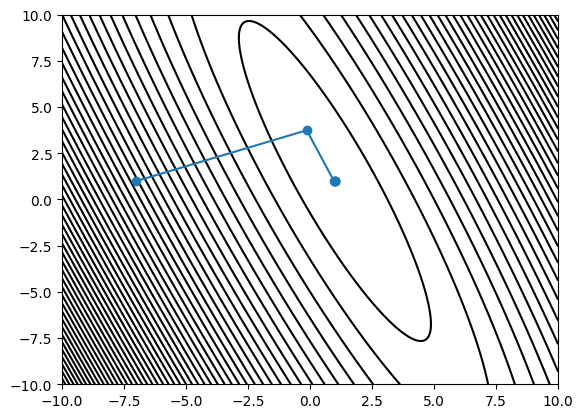

In [5]:
def f(x1,x2):
    return 5*x1**2+x2**2+4*x1*x2-14*x1-6*x2+20

x = np.linspace(-10,10,250)
y = np.linspace(-10,10,250)

xx,yy = np.meshgrid(x,y)

plt.contour(xx,yy,f(xx,yy),50,colors='black')

plt.plot(x1_pd,x2_pd,marker = 'o')

plt.show()
